In [44]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

from datetime import datetime
from dateutil.parser import parse

import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "/home/ubuntu/unearthed_water/"


In [3]:
onlyfiles = [f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f))]
onlyfiles

['test.csv', 'train.csv']

In [13]:

train = pd.read_csv(DATA_DIR+"train.csv")
print (type(train), train.shape)

<class 'pandas.core.frame.DataFrame'> (570300, 29)


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
train_colnames = list(train)
train_colnames

['timestamp',
 'WQI8100XCL1.CPV',
 'XI84201.PV',
 'XI84202.PV',
 'XI84123.PV',
 'XI84124.PV',
 'XI84125.PV',
 'FX87211.CPV1',
 'FIC87211.PV',
 'FIC87211.SV',
 'FX87211.P01',
 'FI87208.PV',
 'AIC88049.PV',
 'ZI88001.PV',
 'NIC88002.PV',
 'PIC88007.PV',
 'LIC88006.PV',
 'AIC88055.PV',
 'FIC88022.PV',
 'DIC88023.PV',
 'II88151.PV',
 'II88152.PV',
 'SI88033.PV',
 'SI88034.PV',
 'MQI88024.CPV',
 'FV88156.PV',
 'FV88043.PV',
 'FV88044.PV',
 'target']

In [19]:
train.head(5)

,timestamp,WQI8100XCL1.CPV,XI84201.PV,XI84202.PV,XI84123.PV,XI84124.PV,XI84125.PV,FX87211.CPV1,FIC87211.PV,FIC87211.SV,...,DIC88023.PV,II88151.PV,II88152.PV,SI88033.PV,SI88034.PV,MQI88024.CPV,FV88156.PV,FV88043.PV,FV88044.PV,target
0,2015-04-01 00:00:00,741.9462,101.188,82.2091,0.0625,5.72497,26.7562,747.172,4226.19,4190.6,...,55.3623,No Data,No Data,0.0815983,71.8973,697.838,No Data,No Data,No Data,56.0887
1,2015-04-01 00:01:00,746.5532,103.251,81.4628,0.0625,5.72497,26.7562,746.348,4205.33,4189.08,...,55.3483,No Data,No Data,0.0823865,71.5966,697.288,No Data,No Data,No Data,56.0813
2,2015-04-01 00:02:00,731.2003,103.803,81.3842,0.0625,5.72497,26.7562,745.524,4211.97,4185.91,...,55.3422,No Data,No Data,0.0805558,71.7189,694.182,No Data,No Data,No Data,56.0751
3,2015-04-01 00:03:00,736.6832,104.336,81.2412,0.0655762,5.61836,26.3297,744.66,4155.31,4182.59,...,55.3453,No Data,No Data,0.0807685,71.6621,694.544,No Data,No Data,No Data,56.0808
4,2015-04-01 00:04:00,732.5973,106.718,80.5021,0.0655762,5.60313,25.9048,743.769,4161.92,4179.06,...,55.3386,No Data,No Data,0.0806371,71.7182,693.458,No Data,No Data,No Data,56.0832


In [16]:
bad_list = ['No Data', 'I/O Timeout', 'Bad Input', 'Scan Off']

In [18]:
print (train.shape)
cols_to_delete = []
for colname in train_colnames:
    try:
        badcount = []
        for bad in bad_list:
            badcount.append(train[colname].str.contains(bad).sum())
        print (colname, "\t", dict(zip(bad_list, badcount))  , train[colname].dtype)
        if badcount[0] == train.shape[0]:
            cols_to_delete.append(colname)
        """
        try:
            if colname != 'timestamp':
                print ("downcasting: ", colname, ", dtype:", train[colname].dtype)
                train[colname] = pd.to_numeric(train[colname])#this is failing
                print ("column downcast: ", train[colname].dtype)
        except Exception as e: 
            print("error downcasting", e) 
        """
    except Exception as e: 
        print(e)
        print ("error", colname)
        #added this since reusing this code block for data exploration
print ("cols_to_delete:", cols_to_delete)
#cols_to_delete: ['II88151.PV', 'II88152.PV', 'FV88156.PV', 'FV88043.PV', 'FV88044.PV']

(570300, 29)
timestamp 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 0, 'I/O Timeout': 0} object
WQI8100XCL1.CPV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 2705, 'I/O Timeout': 8} object
XI84201.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1307, 'I/O Timeout': 0} object
XI84202.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1307, 'I/O Timeout': 0} object
XI84123.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1308, 'I/O Timeout': 0} object
XI84124.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1312, 'I/O Timeout': 0} object
XI84125.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1316, 'I/O Timeout': 0} object
FX87211.CPV1 	 {'No Data': 0, 'Scan Off': 125, 'Bad Input': 1307, 'I/O Timeout': 0} object
FIC87211.PV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1307, 'I/O Timeout': 0} object
FIC87211.SV 	 {'No Data': 0, 'Scan Off': 0, 'Bad Input': 1307, 'I/O Timeout': 0} object
FX87211.P01 	 {'No Data': 0, 'Scan Off': 125, 'Bad Input': 1307, 'I/O Timeout': 0} object
FI87208.PV 	 {'No Da

In [20]:
print (train.shape)
train = train.drop(cols_to_delete, axis=1)
print (train.shape)

(570300, 29)
(570300, 24)


In [29]:
print (train.shape)
cols_to_delete = []
for colname in train_colnames[1:len(train_colnames)]:
    print ("colname:", colname)
    for bad in bad_list:
        print ("bad:", bad)
        #find max consecutive number of bad values. need to know how this will affect handling bad data.
        consec_count_list = []
        max_consec = 0
        bad_count = 0
        for i in range(1,train.shape[0]-1):
            if train[colname].iloc[i]==bad and train[colname].iloc[i-1]==bad:
                #print (bad, i, bad_count)
                bad_count += 1
            elif bad_count > max_consec:
                max_consec = bad_count
                bad_count = 0
                print ("max_consec of consecutive instances of ", bad, ":", max_consec)
            if train[colname].iloc[i]!=bad and train[colname].iloc[i-1]==bad:
                #end of bad text run
                if bad_count>0:
                    consec_count_list.append(bad_count)
        print (bad, "consec_count_list:", consec_count_list)
            


(570300, 24)
colname: WQI8100XCL1.CPV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
max_consec of consecutive instances of  I/O Timeout : 3
I/O Timeout consec_count_list: [3]
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 920
max_consec of consecutive instances of  Bad Input : 1783
Bad Input consec_count_list: []
bad: Scan Off
Scan Off consec_count_list: []
colname: XI84201.PV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
I/O Timeout consec_count_list: []
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 1291
Bad Input consec_count_list: [14]
bad: Scan Off
Scan Off consec_count_list: []
colname: XI84202.PV
bad: No Data
No Data consec_count_list: []
bad: I/O Timeout
I/O Timeout consec_count_list: []
bad: Bad Input
max_consec of consecutive instances of  Bad Input : 1291
Bad Input consec_count_list: [14]
bad: Scan Off
Scan Off consec_count_list: []
colname: XI84123.PV
bad: No Data
No Data consec_count_list: []
bad: I/O Time

KeyboardInterrupt: 

In [32]:
#2015-04-01 00:00:00

#pd.to_datetime(pd.Series(['05/23/2005']))
test_date = pd.to_datetime(pd.Series(['2015-04-01 00:00:00']))
test_date

0   2015-04-01
dtype: datetime64[ns]

In [69]:
print (train['timestamp'].shape[0])
train_timestamp = []
for i in range(0, train['timestamp'].shape[0]):
    train_timestamp.append(datetime.strptime(train['timestamp'][i], '%Y-%m-%d %H:%M:%S'))
#train_timestamp

570300


[datetime.datetime(2015, 4, 1, 0, 0),
 datetime.datetime(2015, 4, 1, 0, 1),
 datetime.datetime(2015, 4, 1, 0, 2),
 datetime.datetime(2015, 4, 1, 0, 3),
 datetime.datetime(2015, 4, 1, 0, 4),
 datetime.datetime(2015, 4, 1, 0, 5),
 datetime.datetime(2015, 4, 1, 0, 6),
 datetime.datetime(2015, 4, 1, 0, 7),
 datetime.datetime(2015, 4, 1, 0, 8),
 datetime.datetime(2015, 4, 1, 0, 9),
 datetime.datetime(2015, 4, 1, 0, 10),
 datetime.datetime(2015, 4, 1, 0, 11),
 datetime.datetime(2015, 4, 1, 0, 12),
 datetime.datetime(2015, 4, 1, 0, 13),
 datetime.datetime(2015, 4, 1, 0, 14),
 datetime.datetime(2015, 4, 1, 0, 15),
 datetime.datetime(2015, 4, 1, 0, 16),
 datetime.datetime(2015, 4, 1, 0, 17),
 datetime.datetime(2015, 4, 1, 0, 18),
 datetime.datetime(2015, 4, 1, 0, 19),
 datetime.datetime(2015, 4, 1, 0, 20),
 datetime.datetime(2015, 4, 1, 0, 21),
 datetime.datetime(2015, 4, 1, 0, 22),
 datetime.datetime(2015, 4, 1, 0, 23),
 datetime.datetime(2015, 4, 1, 0, 24),
 datetime.datetime(2015, 4, 1, 0, 2

In [62]:
train_target = pd.to_numeric(train['target'], errors='coerce', downcast=None)
train_target[0:3]

0    56.08870
1    56.08130
2    56.07510
3    56.08075
4    56.08325
5    56.07410
6    56.06334
7    56.08060
8    56.08370
9    56.08195
Name: target, dtype: float64

In [ ]:
#skip test file for now, just testing loading.
#test = pd.read_csv(DATA_DIR+"test.csv")
#print (type(test), test.shape)
#test.head(5)


In [70]:
type(train_timestamp[0])

datetime.datetime

<IPython.core.display.Javascript object>


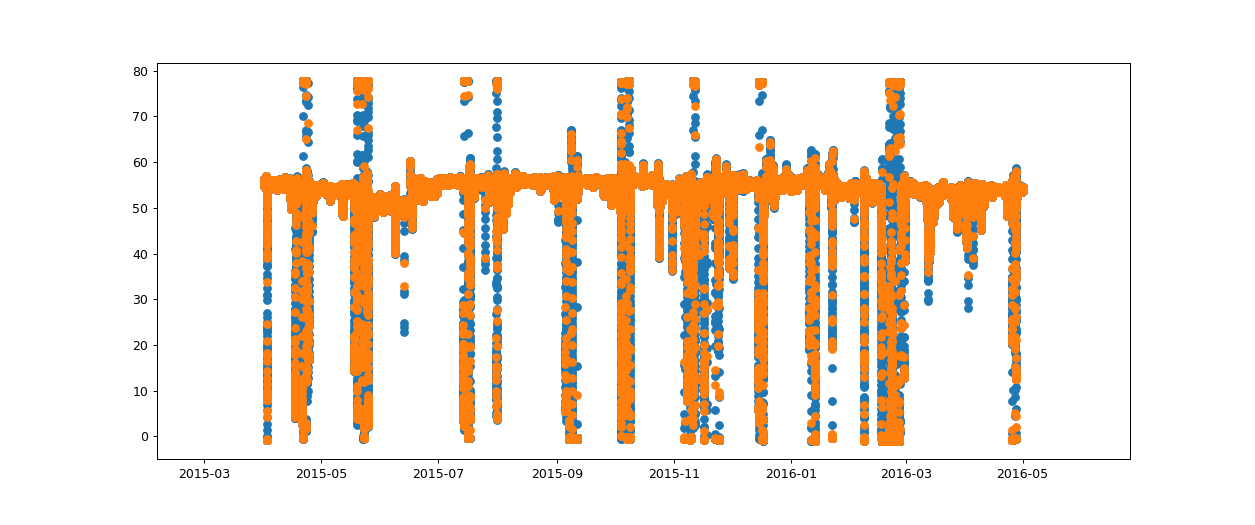

In [73]:
import pandas.plotting._converter as pandacnv
pandacnv.register()
%matplotlib notebook

plt.scatter(train_timestamp, train_target)
plt.show()

In [72]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [89]:
#take average of values over time period X.
def smoothing(input_col, input_timestamp, smooth_period):
    output = []
    timestamp_output = []
    for i in range(0, input_col.shape[0], smooth_period):
        output.append(train_target[i:i+smooth_period].mean())
        timestamp_output.append(input_timestamp[i])
        print (i)
    return output, timestamp_output

In [90]:
print (type(train_target))
print (train_target[0:5].mean())

<class 'pandas.core.series.Series'>
56.08182


In [91]:
print (train_target.shape[0])

train_target_smoothed, train_timestamp_smoothed = smoothing(train_target, train_timestamp, 5)

570300
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210


9905
9910
9915
9920
9925
9930
9935
9940
9945
9950
9955
9960
9965
9970
9975
9980
9985
9990
9995
10000
10005
10010
10015
10020
10025
10030
10035
10040
10045
10050
10055
10060
10065
10070
10075
10080
10085
10090
10095
10100
10105
10110
10115
10120
10125
10130
10135
10140
10145
10150
10155
10160
10165
10170
10175
10180
10185
10190
10195
10200
10205
10210
10215
10220
10225
10230
10235
10240
10245
10250
10255
10260
10265
10270
10275
10280
10285
10290
10295
10300
10305
10310
10315
10320
10325
10330
10335
10340
10345
10350
10355
10360
10365
10370
10375
10380
10385
10390
10395
10400
10405
10410
10415
10420
10425
10430
10435
10440
10445
10450
10455
10460
10465
10470
10475
10480
10485
10490
10495
10500
10505
10510
10515
10520
10525
10530
10535
10540
10545
10550
10555
10560
10565
10570
10575
10580
10585
10590
10595
10600
10605
10610
10615
10620
10625
10630
10635
10640
10645
10650
10655
10660
10665
10670
10675
10680
10685
10690
10695
10700
10705
10710
10715
10720
10725
10730
10735
10740
10745
10750

20075
20080
20085
20090
20095
20100
20105
20110
20115
20120
20125
20130
20135
20140
20145
20150
20155
20160
20165
20170
20175
20180
20185
20190
20195
20200
20205
20210
20215
20220
20225
20230
20235
20240
20245
20250
20255
20260
20265
20270
20275
20280
20285
20290
20295
20300
20305
20310
20315
20320
20325
20330
20335
20340
20345
20350
20355
20360
20365
20370
20375
20380
20385
20390
20395
20400
20405
20410
20415
20420
20425
20430
20435
20440
20445
20450
20455
20460
20465
20470
20475
20480
20485
20490
20495
20500
20505
20510
20515
20520
20525
20530
20535
20540
20545
20550
20555
20560
20565
20570
20575
20580
20585
20590
20595
20600
20605
20610
20615
20620
20625
20630
20635
20640
20645
20650
20655
20660
20665
20670
20675
20680
20685
20690
20695
20700
20705
20710
20715
20720
20725
20730
20735
20740
20745
20750
20755
20760
20765
20770
20775
20780
20785
20790
20795
20800
20805
20810
20815
20820
20825
20830
20835
20840
20845
20850
20855
20860
20865
20870
20875
20880
20885
20890
20895
20900
2090

29945
29950
29955
29960
29965
29970
29975
29980
29985
29990
29995
30000
30005
30010
30015
30020
30025
30030
30035
30040
30045
30050
30055
30060
30065
30070
30075
30080
30085
30090
30095
30100
30105
30110
30115
30120
30125
30130
30135
30140
30145
30150
30155
30160
30165
30170
30175
30180
30185
30190
30195
30200
30205
30210
30215
30220
30225
30230
30235
30240
30245
30250
30255
30260
30265
30270
30275
30280
30285
30290
30295
30300
30305
30310
30315
30320
30325
30330
30335
30340
30345
30350
30355
30360
30365
30370
30375
30380
30385
30390
30395
30400
30405
30410
30415
30420
30425
30430
30435
30440
30445
30450
30455
30460
30465
30470
30475
30480
30485
30490
30495
30500
30505
30510
30515
30520
30525
30530
30535
30540
30545
30550
30555
30560
30565
30570
30575
30580
30585
30590
30595
30600
30605
30610
30615
30620
30625
30630
30635
30640
30645
30650
30655
30660
30665
30670
30675
30680
30685
30690
30695
30700
30705
30710
30715
30720
30725
30730
30735
30740
30745
30750
30755
30760
30765
30770
3077

39905
39910
39915
39920
39925
39930
39935
39940
39945
39950
39955
39960
39965
39970
39975
39980
39985
39990
39995
40000
40005
40010
40015
40020
40025
40030
40035
40040
40045
40050
40055
40060
40065
40070
40075
40080
40085
40090
40095
40100
40105
40110
40115
40120
40125
40130
40135
40140
40145
40150
40155
40160
40165
40170
40175
40180
40185
40190
40195
40200
40205
40210
40215
40220
40225
40230
40235
40240
40245
40250
40255
40260
40265
40270
40275
40280
40285
40290
40295
40300
40305
40310
40315
40320
40325
40330
40335
40340
40345
40350
40355
40360
40365
40370
40375
40380
40385
40390
40395
40400
40405
40410
40415
40420
40425
40430
40435
40440
40445
40450
40455
40460
40465
40470
40475
40480
40485
40490
40495
40500
40505
40510
40515
40520
40525
40530
40535
40540
40545
40550
40555
40560
40565
40570
40575
40580
40585
40590
40595
40600
40605
40610
40615
40620
40625
40630
40635
40640
40645
40650
40655
40660
40665
40670
40675
40680
40685
40690
40695
40700
40705
40710
40715
40720
40725
40730
4073

49930
49935
49940
49945
49950
49955
49960
49965
49970
49975
49980
49985
49990
49995
50000
50005
50010
50015
50020
50025
50030
50035
50040
50045
50050
50055
50060
50065
50070
50075
50080
50085
50090
50095
50100
50105
50110
50115
50120
50125
50130
50135
50140
50145
50150
50155
50160
50165
50170
50175
50180
50185
50190
50195
50200
50205
50210
50215
50220
50225
50230
50235
50240
50245
50250
50255
50260
50265
50270
50275
50280
50285
50290
50295
50300
50305
50310
50315
50320
50325
50330
50335
50340
50345
50350
50355
50360
50365
50370
50375
50380
50385
50390
50395
50400
50405
50410
50415
50420
50425
50430
50435
50440
50445
50450
50455
50460
50465
50470
50475
50480
50485
50490
50495
50500
50505
50510
50515
50520
50525
50530
50535
50540
50545
50550
50555
50560
50565
50570
50575
50580
50585
50590
50595
50600
50605
50610
50615
50620
50625
50630
50635
50640
50645
50650
50655
50660
50665
50670
50675
50680
50685
50690
50695
50700
50705
50710
50715
50720
50725
50730
50735
50740
50745
50750
50755
5076

60110
60115
60120
60125
60130
60135
60140
60145
60150
60155
60160
60165
60170
60175
60180
60185
60190
60195
60200
60205
60210
60215
60220
60225
60230
60235
60240
60245
60250
60255
60260
60265
60270
60275
60280
60285
60290
60295
60300
60305
60310
60315
60320
60325
60330
60335
60340
60345
60350
60355
60360
60365
60370
60375
60380
60385
60390
60395
60400
60405
60410
60415
60420
60425
60430
60435
60440
60445
60450
60455
60460
60465
60470
60475
60480
60485
60490
60495
60500
60505
60510
60515
60520
60525
60530
60535
60540
60545
60550
60555
60560
60565
60570
60575
60580
60585
60590
60595
60600
60605
60610
60615
60620
60625
60630
60635
60640
60645
60650
60655
60660
60665
60670
60675
60680
60685
60690
60695
60700
60705
60710
60715
60720
60725
60730
60735
60740
60745
60750
60755
60760
60765
60770
60775
60780
60785
60790
60795
60800
60805
60810
60815
60820
60825
60830
60835
60840
60845
60850
60855
60860
60865
60870
60875
60880
60885
60890
60895
60900
60905
60910
60915
60920
60925
60930
60935
6094

70455
70460
70465
70470
70475
70480
70485
70490
70495
70500
70505
70510
70515
70520
70525
70530
70535
70540
70545
70550
70555
70560
70565
70570
70575
70580
70585
70590
70595
70600
70605
70610
70615
70620
70625
70630
70635
70640
70645
70650
70655
70660
70665
70670
70675
70680
70685
70690
70695
70700
70705
70710
70715
70720
70725
70730
70735
70740
70745
70750
70755
70760
70765
70770
70775
70780
70785
70790
70795
70800
70805
70810
70815
70820
70825
70830
70835
70840
70845
70850
70855
70860
70865
70870
70875
70880
70885
70890
70895
70900
70905
70910
70915
70920
70925
70930
70935
70940
70945
70950
70955
70960
70965
70970
70975
70980
70985
70990
70995
71000
71005
71010
71015
71020
71025
71030
71035
71040
71045
71050
71055
71060
71065
71070
71075
71080
71085
71090
71095
71100
71105
71110
71115
71120
71125
71130
71135
71140
71145
71150
71155
71160
71165
71170
71175
71180
71185
71190
71195
71200
71205
71210
71215
71220
71225
71230
71235
71240
71245
71250
71255
71260
71265
71270
71275
71280
7128

80455
80460
80465
80470
80475
80480
80485
80490
80495
80500
80505
80510
80515
80520
80525
80530
80535
80540
80545
80550
80555
80560
80565
80570
80575
80580
80585
80590
80595
80600
80605
80610
80615
80620
80625
80630
80635
80640
80645
80650
80655
80660
80665
80670
80675
80680
80685
80690
80695
80700
80705
80710
80715
80720
80725
80730
80735
80740
80745
80750
80755
80760
80765
80770
80775
80780
80785
80790
80795
80800
80805
80810
80815
80820
80825
80830
80835
80840
80845
80850
80855
80860
80865
80870
80875
80880
80885
80890
80895
80900
80905
80910
80915
80920
80925
80930
80935
80940
80945
80950
80955
80960
80965
80970
80975
80980
80985
80990
80995
81000
81005
81010
81015
81020
81025
81030
81035
81040
81045
81050
81055
81060
81065
81070
81075
81080
81085
81090
81095
81100
81105
81110
81115
81120
81125
81130
81135
81140
81145
81150
81155
81160
81165
81170
81175
81180
81185
81190
81195
81200
81205
81210
81215
81220
81225
81230
81235
81240
81245
81250
81255
81260
81265
81270
81275
81280
8128

90550
90555
90560
90565
90570
90575
90580
90585
90590
90595
90600
90605
90610
90615
90620
90625
90630
90635
90640
90645
90650
90655
90660
90665
90670
90675
90680
90685
90690
90695
90700
90705
90710
90715
90720
90725
90730
90735
90740
90745
90750
90755
90760
90765
90770
90775
90780
90785
90790
90795
90800
90805
90810
90815
90820
90825
90830
90835
90840
90845
90850
90855
90860
90865
90870
90875
90880
90885
90890
90895
90900
90905
90910
90915
90920
90925
90930
90935
90940
90945
90950
90955
90960
90965
90970
90975
90980
90985
90990
90995
91000
91005
91010
91015
91020
91025
91030
91035
91040
91045
91050
91055
91060
91065
91070
91075
91080
91085
91090
91095
91100
91105
91110
91115
91120
91125
91130
91135
91140
91145
91150
91155
91160
91165
91170
91175
91180
91185
91190
91195
91200
91205
91210
91215
91220
91225
91230
91235
91240
91245
91250
91255
91260
91265
91270
91275
91280
91285
91290
91295
91300
91305
91310
91315
91320
91325
91330
91335
91340
91345
91350
91355
91360
91365
91370
91375
9138

97480
97485
97490
97495
97500
97505
97510
97515
97520
97525
97530
97535
97540
97545
97550
97555
97560
97565
97570
97575
97580
97585
97590
97595
97600
97605
97610
97615
97620
97625
97630
97635
97640
97645
97650
97655
97660
97665
97670
97675
97680
97685
97690
97695
97700
97705
97710
97715
97720
97725
97730
97735
97740
97745
97750
97755
97760
97765
97770
97775
97780
97785
97790
97795
97800
97805
97810
97815
97820
97825
97830
97835
97840
97845
97850
97855
97860
97865
97870
97875
97880
97885
97890
97895
97900
97905
97910
97915
97920
97925
97930
97935
97940
97945
97950
97955
97960
97965
97970
97975
97980
97985
97990
97995
98000
98005
98010
98015
98020
98025
98030
98035
98040
98045
98050
98055
98060
98065
98070
98075
98080
98085
98090
98095
98100
98105
98110
98115
98120
98125
98130
98135
98140
98145
98150
98155
98160
98165
98170
98175
98180
98185
98190
98195
98200
98205
98210
98215
98220
98225
98230
98235
98240
98245
98250
98255
98260
98265
98270
98275
98280
98285
98290
98295
98300
98305
9831

104135
104140
104145
104150
104155
104160
104165
104170
104175
104180
104185
104190
104195
104200
104205
104210
104215
104220
104225
104230
104235
104240
104245
104250
104255
104260
104265
104270
104275
104280
104285
104290
104295
104300
104305
104310
104315
104320
104325
104330
104335
104340
104345
104350
104355
104360
104365
104370
104375
104380
104385
104390
104395
104400
104405
104410
104415
104420
104425
104430
104435
104440
104445
104450
104455
104460
104465
104470
104475
104480
104485
104490
104495
104500
104505
104510
104515
104520
104525
104530
104535
104540
104545
104550
104555
104560
104565
104570
104575
104580
104585
104590
104595
104600
104605
104610
104615
104620
104625
104630
104635
104640
104645
104650
104655
104660
104665
104670
104675
104680
104685
104690
104695
104700
104705
104710
104715
104720
104725
104730
104735
104740
104745
104750
104755
104760
104765
104770
104775
104780
104785
104790
104795
104800
104805
104810
104815
104820
104825
104830
104835
104840
104845

111020
111025
111030
111035
111040
111045
111050
111055
111060
111065
111070
111075
111080
111085
111090
111095
111100
111105
111110
111115
111120
111125
111130
111135
111140
111145
111150
111155
111160
111165
111170
111175
111180
111185
111190
111195
111200
111205
111210
111215
111220
111225
111230
111235
111240
111245
111250
111255
111260
111265
111270
111275
111280
111285
111290
111295
111300
111305
111310
111315
111320
111325
111330
111335
111340
111345
111350
111355
111360
111365
111370
111375
111380
111385
111390
111395
111400
111405
111410
111415
111420
111425
111430
111435
111440
111445
111450
111455
111460
111465
111470
111475
111480
111485
111490
111495
111500
111505
111510
111515
111520
111525
111530
111535
111540
111545
111550
111555
111560
111565
111570
111575
111580
111585
111590
111595
111600
111605
111610
111615
111620
111625
111630
111635
111640
111645
111650
111655
111660
111665
111670
111675
111680
111685
111690
111695
111700
111705
111710
111715
111720
111725
111730

117955
117960
117965
117970
117975
117980
117985
117990
117995
118000
118005
118010
118015
118020
118025
118030
118035
118040
118045
118050
118055
118060
118065
118070
118075
118080
118085
118090
118095
118100
118105
118110
118115
118120
118125
118130
118135
118140
118145
118150
118155
118160
118165
118170
118175
118180
118185
118190
118195
118200
118205
118210
118215
118220
118225
118230
118235
118240
118245
118250
118255
118260
118265
118270
118275
118280
118285
118290
118295
118300
118305
118310
118315
118320
118325
118330
118335
118340
118345
118350
118355
118360
118365
118370
118375
118380
118385
118390
118395
118400
118405
118410
118415
118420
118425
118430
118435
118440
118445
118450
118455
118460
118465
118470
118475
118480
118485
118490
118495
118500
118505
118510
118515
118520
118525
118530
118535
118540
118545
118550
118555
118560
118565
118570
118575
118580
118585
118590
118595
118600
118605
118610
118615
118620
118625
118630
118635
118640
118645
118650
118655
118660
118665

124670
124675
124680
124685
124690
124695
124700
124705
124710
124715
124720
124725
124730
124735
124740
124745
124750
124755
124760
124765
124770
124775
124780
124785
124790
124795
124800
124805
124810
124815
124820
124825
124830
124835
124840
124845
124850
124855
124860
124865
124870
124875
124880
124885
124890
124895
124900
124905
124910
124915
124920
124925
124930
124935
124940
124945
124950
124955
124960
124965
124970
124975
124980
124985
124990
124995
125000
125005
125010
125015
125020
125025
125030
125035
125040
125045
125050
125055
125060
125065
125070
125075
125080
125085
125090
125095
125100
125105
125110
125115
125120
125125
125130
125135
125140
125145
125150
125155
125160
125165
125170
125175
125180
125185
125190
125195
125200
125205
125210
125215
125220
125225
125230
125235
125240
125245
125250
125255
125260
125265
125270
125275
125280
125285
125290
125295
125300
125305
125310
125315
125320
125325
125330
125335
125340
125345
125350
125355
125360
125365
125370
125375
125380

131630
131635
131640
131645
131650
131655
131660
131665
131670
131675
131680
131685
131690
131695
131700
131705
131710
131715
131720
131725
131730
131735
131740
131745
131750
131755
131760
131765
131770
131775
131780
131785
131790
131795
131800
131805
131810
131815
131820
131825
131830
131835
131840
131845
131850
131855
131860
131865
131870
131875
131880
131885
131890
131895
131900
131905
131910
131915
131920
131925
131930
131935
131940
131945
131950
131955
131960
131965
131970
131975
131980
131985
131990
131995
132000
132005
132010
132015
132020
132025
132030
132035
132040
132045
132050
132055
132060
132065
132070
132075
132080
132085
132090
132095
132100
132105
132110
132115
132120
132125
132130
132135
132140
132145
132150
132155
132160
132165
132170
132175
132180
132185
132190
132195
132200
132205
132210
132215
132220
132225
132230
132235
132240
132245
132250
132255
132260
132265
132270
132275
132280
132285
132290
132295
132300
132305
132310
132315
132320
132325
132330
132335
132340

138280
138285
138290
138295
138300
138305
138310
138315
138320
138325
138330
138335
138340
138345
138350
138355
138360
138365
138370
138375
138380
138385
138390
138395
138400
138405
138410
138415
138420
138425
138430
138435
138440
138445
138450
138455
138460
138465
138470
138475
138480
138485
138490
138495
138500
138505
138510
138515
138520
138525
138530
138535
138540
138545
138550
138555
138560
138565
138570
138575
138580
138585
138590
138595
138600
138605
138610
138615
138620
138625
138630
138635
138640
138645
138650
138655
138660
138665
138670
138675
138680
138685
138690
138695
138700
138705
138710
138715
138720
138725
138730
138735
138740
138745
138750
138755
138760
138765
138770
138775
138780
138785
138790
138795
138800
138805
138810
138815
138820
138825
138830
138835
138840
138845
138850
138855
138860
138865
138870
138875
138880
138885
138890
138895
138900
138905
138910
138915
138920
138925
138930
138935
138940
138945
138950
138955
138960
138965
138970
138975
138980
138985
138990

145050
145055
145060
145065
145070
145075
145080
145085
145090
145095
145100
145105
145110
145115
145120
145125
145130
145135
145140
145145
145150
145155
145160
145165
145170
145175
145180
145185
145190
145195
145200
145205
145210
145215
145220
145225
145230
145235
145240
145245
145250
145255
145260
145265
145270
145275
145280
145285
145290
145295
145300
145305
145310
145315
145320
145325
145330
145335
145340
145345
145350
145355
145360
145365
145370
145375
145380
145385
145390
145395
145400
145405
145410
145415
145420
145425
145430
145435
145440
145445
145450
145455
145460
145465
145470
145475
145480
145485
145490
145495
145500
145505
145510
145515
145520
145525
145530
145535
145540
145545
145550
145555
145560
145565
145570
145575
145580
145585
145590
145595
145600
145605
145610
145615
145620
145625
145630
145635
145640
145645
145650
145655
145660
145665
145670
145675
145680
145685
145690
145695
145700
145705
145710
145715
145720
145725
145730
145735
145740
145745
145750
145755
145760

151770
151775
151780
151785
151790
151795
151800
151805
151810
151815
151820
151825
151830
151835
151840
151845
151850
151855
151860
151865
151870
151875
151880
151885
151890
151895
151900
151905
151910
151915
151920
151925
151930
151935
151940
151945
151950
151955
151960
151965
151970
151975
151980
151985
151990
151995
152000
152005
152010
152015
152020
152025
152030
152035
152040
152045
152050
152055
152060
152065
152070
152075
152080
152085
152090
152095
152100
152105
152110
152115
152120
152125
152130
152135
152140
152145
152150
152155
152160
152165
152170
152175
152180
152185
152190
152195
152200
152205
152210
152215
152220
152225
152230
152235
152240
152245
152250
152255
152260
152265
152270
152275
152280
152285
152290
152295
152300
152305
152310
152315
152320
152325
152330
152335
152340
152345
152350
152355
152360
152365
152370
152375
152380
152385
152390
152395
152400
152405
152410
152415
152420
152425
152430
152435
152440
152445
152450
152455
152460
152465
152470
152475
152480

158690
158695
158700
158705
158710
158715
158720
158725
158730
158735
158740
158745
158750
158755
158760
158765
158770
158775
158780
158785
158790
158795
158800
158805
158810
158815
158820
158825
158830
158835
158840
158845
158850
158855
158860
158865
158870
158875
158880
158885
158890
158895
158900
158905
158910
158915
158920
158925
158930
158935
158940
158945
158950
158955
158960
158965
158970
158975
158980
158985
158990
158995
159000
159005
159010
159015
159020
159025
159030
159035
159040
159045
159050
159055
159060
159065
159070
159075
159080
159085
159090
159095
159100
159105
159110
159115
159120
159125
159130
159135
159140
159145
159150
159155
159160
159165
159170
159175
159180
159185
159190
159195
159200
159205
159210
159215
159220
159225
159230
159235
159240
159245
159250
159255
159260
159265
159270
159275
159280
159285
159290
159295
159300
159305
159310
159315
159320
159325
159330
159335
159340
159345
159350
159355
159360
159365
159370
159375
159380
159385
159390
159395
159400

165345
165350
165355
165360
165365
165370
165375
165380
165385
165390
165395
165400
165405
165410
165415
165420
165425
165430
165435
165440
165445
165450
165455
165460
165465
165470
165475
165480
165485
165490
165495
165500
165505
165510
165515
165520
165525
165530
165535
165540
165545
165550
165555
165560
165565
165570
165575
165580
165585
165590
165595
165600
165605
165610
165615
165620
165625
165630
165635
165640
165645
165650
165655
165660
165665
165670
165675
165680
165685
165690
165695
165700
165705
165710
165715
165720
165725
165730
165735
165740
165745
165750
165755
165760
165765
165770
165775
165780
165785
165790
165795
165800
165805
165810
165815
165820
165825
165830
165835
165840
165845
165850
165855
165860
165865
165870
165875
165880
165885
165890
165895
165900
165905
165910
165915
165920
165925
165930
165935
165940
165945
165950
165955
165960
165965
165970
165975
165980
165985
165990
165995
166000
166005
166010
166015
166020
166025
166030
166035
166040
166045
166050
166055

172015
172020
172025
172030
172035
172040
172045
172050
172055
172060
172065
172070
172075
172080
172085
172090
172095
172100
172105
172110
172115
172120
172125
172130
172135
172140
172145
172150
172155
172160
172165
172170
172175
172180
172185
172190
172195
172200
172205
172210
172215
172220
172225
172230
172235
172240
172245
172250
172255
172260
172265
172270
172275
172280
172285
172290
172295
172300
172305
172310
172315
172320
172325
172330
172335
172340
172345
172350
172355
172360
172365
172370
172375
172380
172385
172390
172395
172400
172405
172410
172415
172420
172425
172430
172435
172440
172445
172450
172455
172460
172465
172470
172475
172480
172485
172490
172495
172500
172505
172510
172515
172520
172525
172530
172535
172540
172545
172550
172555
172560
172565
172570
172575
172580
172585
172590
172595
172600
172605
172610
172615
172620
172625
172630
172635
172640
172645
172650
172655
172660
172665
172670
172675
172680
172685
172690
172695
172700
172705
172710
172715
172720
172725

178065
178070
178075
178080
178085
178090
178095
178100
178105
178110
178115
178120
178125
178130
178135
178140
178145
178150
178155
178160
178165
178170
178175
178180
178185
178190
178195
178200
178205
178210
178215
178220
178225
178230
178235
178240
178245
178250
178255
178260
178265
178270
178275
178280
178285
178290
178295
178300
178305
178310
178315
178320
178325
178330
178335
178340
178345
178350
178355
178360
178365
178370
178375
178380
178385
178390
178395
178400
178405
178410
178415
178420
178425
178430
178435
178440
178445
178450
178455
178460
178465
178470
178475
178480
178485
178490
178495
178500
178505
178510
178515
178520
178525
178530
178535
178540
178545
178550
178555
178560
178565
178570
178575
178580
178585
178590
178595
178600
178605
178610
178615
178620
178625
178630
178635
178640
178645
178650
178655
178660
178665
178670
178675
178680
178685
178690
178695
178700
178705
178710
178715
178720
178725
178730
178735
178740
178745
178750
178755
178760
178765
178770
178775

184515
184520
184525
184530
184535
184540
184545
184550
184555
184560
184565
184570
184575
184580
184585
184590
184595
184600
184605
184610
184615
184620
184625
184630
184635
184640
184645
184650
184655
184660
184665
184670
184675
184680
184685
184690
184695
184700
184705
184710
184715
184720
184725
184730
184735
184740
184745
184750
184755
184760
184765
184770
184775
184780
184785
184790
184795
184800
184805
184810
184815
184820
184825
184830
184835
184840
184845
184850
184855
184860
184865
184870
184875
184880
184885
184890
184895
184900
184905
184910
184915
184920
184925
184930
184935
184940
184945
184950
184955
184960
184965
184970
184975
184980
184985
184990
184995
185000
185005
185010
185015
185020
185025
185030
185035
185040
185045
185050
185055
185060
185065
185070
185075
185080
185085
185090
185095
185100
185105
185110
185115
185120
185125
185130
185135
185140
185145
185150
185155
185160
185165
185170
185175
185180
185185
185190
185195
185200
185205
185210
185215
185220
185225

191505
191510
191515
191520
191525
191530
191535
191540
191545
191550
191555
191560
191565
191570
191575
191580
191585
191590
191595
191600
191605
191610
191615
191620
191625
191630
191635
191640
191645
191650
191655
191660
191665
191670
191675
191680
191685
191690
191695
191700
191705
191710
191715
191720
191725
191730
191735
191740
191745
191750
191755
191760
191765
191770
191775
191780
191785
191790
191795
191800
191805
191810
191815
191820
191825
191830
191835
191840
191845
191850
191855
191860
191865
191870
191875
191880
191885
191890
191895
191900
191905
191910
191915
191920
191925
191930
191935
191940
191945
191950
191955
191960
191965
191970
191975
191980
191985
191990
191995
192000
192005
192010
192015
192020
192025
192030
192035
192040
192045
192050
192055
192060
192065
192070
192075
192080
192085
192090
192095
192100
192105
192110
192115
192120
192125
192130
192135
192140
192145
192150
192155
192160
192165
192170
192175
192180
192185
192190
192195
192200
192205
192210
192215

198320
198325
198330
198335
198340
198345
198350
198355
198360
198365
198370
198375
198380
198385
198390
198395
198400
198405
198410
198415
198420
198425
198430
198435
198440
198445
198450
198455
198460
198465
198470
198475
198480
198485
198490
198495
198500
198505
198510
198515
198520
198525
198530
198535
198540
198545
198550
198555
198560
198565
198570
198575
198580
198585
198590
198595
198600
198605
198610
198615
198620
198625
198630
198635
198640
198645
198650
198655
198660
198665
198670
198675
198680
198685
198690
198695
198700
198705
198710
198715
198720
198725
198730
198735
198740
198745
198750
198755
198760
198765
198770
198775
198780
198785
198790
198795
198800
198805
198810
198815
198820
198825
198830
198835
198840
198845
198850
198855
198860
198865
198870
198875
198880
198885
198890
198895
198900
198905
198910
198915
198920
198925
198930
198935
198940
198945
198950
198955
198960
198965
198970
198975
198980
198985
198990
198995
199000
199005
199010
199015
199020
199025
199030

205150
205155
205160
205165
205170
205175
205180
205185
205190
205195
205200
205205
205210
205215
205220
205225
205230
205235
205240
205245
205250
205255
205260
205265
205270
205275
205280
205285
205290
205295
205300
205305
205310
205315
205320
205325
205330
205335
205340
205345
205350
205355
205360
205365
205370
205375
205380
205385
205390
205395
205400
205405
205410
205415
205420
205425
205430
205435
205440
205445
205450
205455
205460
205465
205470
205475
205480
205485
205490
205495
205500
205505
205510
205515
205520
205525
205530
205535
205540
205545
205550
205555
205560
205565
205570
205575
205580
205585
205590
205595
205600
205605
205610
205615
205620
205625
205630
205635
205640
205645
205650
205655
205660
205665
205670
205675
205680
205685
205690
205695
205700
205705
205710
205715
205720
205725
205730
205735
205740
205745
205750
205755
205760
205765
205770
205775
205780
205785
205790
205795
205800
205805
205810
205815
205820
205825
205830
205835
205840
205845
205850
205855
205860

211850
211855
211860
211865
211870
211875
211880
211885
211890
211895
211900
211905
211910
211915
211920
211925
211930
211935
211940
211945
211950
211955
211960
211965
211970
211975
211980
211985
211990
211995
212000
212005
212010
212015
212020
212025
212030
212035
212040
212045
212050
212055
212060
212065
212070
212075
212080
212085
212090
212095
212100
212105
212110
212115
212120
212125
212130
212135
212140
212145
212150
212155
212160
212165
212170
212175
212180
212185
212190
212195
212200
212205
212210
212215
212220
212225
212230
212235
212240
212245
212250
212255
212260
212265
212270
212275
212280
212285
212290
212295
212300
212305
212310
212315
212320
212325
212330
212335
212340
212345
212350
212355
212360
212365
212370
212375
212380
212385
212390
212395
212400
212405
212410
212415
212420
212425
212430
212435
212440
212445
212450
212455
212460
212465
212470
212475
212480
212485
212490
212495
212500
212505
212510
212515
212520
212525
212530
212535
212540
212545
212550
212555
212560

218690
218695
218700
218705
218710
218715
218720
218725
218730
218735
218740
218745
218750
218755
218760
218765
218770
218775
218780
218785
218790
218795
218800
218805
218810
218815
218820
218825
218830
218835
218840
218845
218850
218855
218860
218865
218870
218875
218880
218885
218890
218895
218900
218905
218910
218915
218920
218925
218930
218935
218940
218945
218950
218955
218960
218965
218970
218975
218980
218985
218990
218995
219000
219005
219010
219015
219020
219025
219030
219035
219040
219045
219050
219055
219060
219065
219070
219075
219080
219085
219090
219095
219100
219105
219110
219115
219120
219125
219130
219135
219140
219145
219150
219155
219160
219165
219170
219175
219180
219185
219190
219195
219200
219205
219210
219215
219220
219225
219230
219235
219240
219245
219250
219255
219260
219265
219270
219275
219280
219285
219290
219295
219300
219305
219310
219315
219320
219325
219330
219335
219340
219345
219350
219355
219360
219365
219370
219375
219380
219385
219390
219395
219400

225550
225555
225560
225565
225570
225575
225580
225585
225590
225595
225600
225605
225610
225615
225620
225625
225630
225635
225640
225645
225650
225655
225660
225665
225670
225675
225680
225685
225690
225695
225700
225705
225710
225715
225720
225725
225730
225735
225740
225745
225750
225755
225760
225765
225770
225775
225780
225785
225790
225795
225800
225805
225810
225815
225820
225825
225830
225835
225840
225845
225850
225855
225860
225865
225870
225875
225880
225885
225890
225895
225900
225905
225910
225915
225920
225925
225930
225935
225940
225945
225950
225955
225960
225965
225970
225975
225980
225985
225990
225995
226000
226005
226010
226015
226020
226025
226030
226035
226040
226045
226050
226055
226060
226065
226070
226075
226080
226085
226090
226095
226100
226105
226110
226115
226120
226125
226130
226135
226140
226145
226150
226155
226160
226165
226170
226175
226180
226185
226190
226195
226200
226205
226210
226215
226220
226225
226230
226235
226240
226245
226250
226255
226260

232335
232340
232345
232350
232355
232360
232365
232370
232375
232380
232385
232390
232395
232400
232405
232410
232415
232420
232425
232430
232435
232440
232445
232450
232455
232460
232465
232470
232475
232480
232485
232490
232495
232500
232505
232510
232515
232520
232525
232530
232535
232540
232545
232550
232555
232560
232565
232570
232575
232580
232585
232590
232595
232600
232605
232610
232615
232620
232625
232630
232635
232640
232645
232650
232655
232660
232665
232670
232675
232680
232685
232690
232695
232700
232705
232710
232715
232720
232725
232730
232735
232740
232745
232750
232755
232760
232765
232770
232775
232780
232785
232790
232795
232800
232805
232810
232815
232820
232825
232830
232835
232840
232845
232850
232855
232860
232865
232870
232875
232880
232885
232890
232895
232900
232905
232910
232915
232920
232925
232930
232935
232940
232945
232950
232955
232960
232965
232970
232975
232980
232985
232990
232995
233000
233005
233010
233015
233020
233025
233030
233035
233040
233045

239245
239250
239255
239260
239265
239270
239275
239280
239285
239290
239295
239300
239305
239310
239315
239320
239325
239330
239335
239340
239345
239350
239355
239360
239365
239370
239375
239380
239385
239390
239395
239400
239405
239410
239415
239420
239425
239430
239435
239440
239445
239450
239455
239460
239465
239470
239475
239480
239485
239490
239495
239500
239505
239510
239515
239520
239525
239530
239535
239540
239545
239550
239555
239560
239565
239570
239575
239580
239585
239590
239595
239600
239605
239610
239615
239620
239625
239630
239635
239640
239645
239650
239655
239660
239665
239670
239675
239680
239685
239690
239695
239700
239705
239710
239715
239720
239725
239730
239735
239740
239745
239750
239755
239760
239765
239770
239775
239780
239785
239790
239795
239800
239805
239810
239815
239820
239825
239830
239835
239840
239845
239850
239855
239860
239865
239870
239875
239880
239885
239890
239895
239900
239905
239910
239915
239920
239925
239930
239935
239940
239945
239950
239955

245960
245965
245970
245975
245980
245985
245990
245995
246000
246005
246010
246015
246020
246025
246030
246035
246040
246045
246050
246055
246060
246065
246070
246075
246080
246085
246090
246095
246100
246105
246110
246115
246120
246125
246130
246135
246140
246145
246150
246155
246160
246165
246170
246175
246180
246185
246190
246195
246200
246205
246210
246215
246220
246225
246230
246235
246240
246245
246250
246255
246260
246265
246270
246275
246280
246285
246290
246295
246300
246305
246310
246315
246320
246325
246330
246335
246340
246345
246350
246355
246360
246365
246370
246375
246380
246385
246390
246395
246400
246405
246410
246415
246420
246425
246430
246435
246440
246445
246450
246455
246460
246465
246470
246475
246480
246485
246490
246495
246500
246505
246510
246515
246520
246525
246530
246535
246540
246545
246550
246555
246560
246565
246570
246575
246580
246585
246590
246595
246600
246605
246610
246615
246620
246625
246630
246635
246640
246645
246650
246655
246660
246665
246670

252610
252615
252620
252625
252630
252635
252640
252645
252650
252655
252660
252665
252670
252675
252680
252685
252690
252695
252700
252705
252710
252715
252720
252725
252730
252735
252740
252745
252750
252755
252760
252765
252770
252775
252780
252785
252790
252795
252800
252805
252810
252815
252820
252825
252830
252835
252840
252845
252850
252855
252860
252865
252870
252875
252880
252885
252890
252895
252900
252905
252910
252915
252920
252925
252930
252935
252940
252945
252950
252955
252960
252965
252970
252975
252980
252985
252990
252995
253000
253005
253010
253015
253020
253025
253030
253035
253040
253045
253050
253055
253060
253065
253070
253075
253080
253085
253090
253095
253100
253105
253110
253115
253120
253125
253130
253135
253140
253145
253150
253155
253160
253165
253170
253175
253180
253185
253190
253195
253200
253205
253210
253215
253220
253225
253230
253235
253240
253245
253250
253255
253260
253265
253270
253275
253280
253285
253290
253295
253300
253305
253310
253315
253320

259415
259420
259425
259430
259435
259440
259445
259450
259455
259460
259465
259470
259475
259480
259485
259490
259495
259500
259505
259510
259515
259520
259525
259530
259535
259540
259545
259550
259555
259560
259565
259570
259575
259580
259585
259590
259595
259600
259605
259610
259615
259620
259625
259630
259635
259640
259645
259650
259655
259660
259665
259670
259675
259680
259685
259690
259695
259700
259705
259710
259715
259720
259725
259730
259735
259740
259745
259750
259755
259760
259765
259770
259775
259780
259785
259790
259795
259800
259805
259810
259815
259820
259825
259830
259835
259840
259845
259850
259855
259860
259865
259870
259875
259880
259885
259890
259895
259900
259905
259910
259915
259920
259925
259930
259935
259940
259945
259950
259955
259960
259965
259970
259975
259980
259985
259990
259995
260000
260005
260010
260015
260020
260025
260030
260035
260040
260045
260050
260055
260060
260065
260070
260075
260080
260085
260090
260095
260100
260105
260110
260115
260120
260125

266435
266440
266445
266450
266455
266460
266465
266470
266475
266480
266485
266490
266495
266500
266505
266510
266515
266520
266525
266530
266535
266540
266545
266550
266555
266560
266565
266570
266575
266580
266585
266590
266595
266600
266605
266610
266615
266620
266625
266630
266635
266640
266645
266650
266655
266660
266665
266670
266675
266680
266685
266690
266695
266700
266705
266710
266715
266720
266725
266730
266735
266740
266745
266750
266755
266760
266765
266770
266775
266780
266785
266790
266795
266800
266805
266810
266815
266820
266825
266830
266835
266840
266845
266850
266855
266860
266865
266870
266875
266880
266885
266890
266895
266900
266905
266910
266915
266920
266925
266930
266935
266940
266945
266950
266955
266960
266965
266970
266975
266980
266985
266990
266995
267000
267005
267010
267015
267020
267025
267030
267035
267040
267045
267050
267055
267060
267065
267070
267075
267080
267085
267090
267095
267100
267105
267110
267115
267120
267125
267130
267135
267140
267145

273355
273360
273365
273370
273375
273380
273385
273390
273395
273400
273405
273410
273415
273420
273425
273430
273435
273440
273445
273450
273455
273460
273465
273470
273475
273480
273485
273490
273495
273500
273505
273510
273515
273520
273525
273530
273535
273540
273545
273550
273555
273560
273565
273570
273575
273580
273585
273590
273595
273600
273605
273610
273615
273620
273625
273630
273635
273640
273645
273650
273655
273660
273665
273670
273675
273680
273685
273690
273695
273700
273705
273710
273715
273720
273725
273730
273735
273740
273745
273750
273755
273760
273765
273770
273775
273780
273785
273790
273795
273800
273805
273810
273815
273820
273825
273830
273835
273840
273845
273850
273855
273860
273865
273870
273875
273880
273885
273890
273895
273900
273905
273910
273915
273920
273925
273930
273935
273940
273945
273950
273955
273960
273965
273970
273975
273980
273985
273990
273995
274000
274005
274010
274015
274020
274025
274030
274035
274040
274045
274050
274055
274060
274065

280355
280360
280365
280370
280375
280380
280385
280390
280395
280400
280405
280410
280415
280420
280425
280430
280435
280440
280445
280450
280455
280460
280465
280470
280475
280480
280485
280490
280495
280500
280505
280510
280515
280520
280525
280530
280535
280540
280545
280550
280555
280560
280565
280570
280575
280580
280585
280590
280595
280600
280605
280610
280615
280620
280625
280630
280635
280640
280645
280650
280655
280660
280665
280670
280675
280680
280685
280690
280695
280700
280705
280710
280715
280720
280725
280730
280735
280740
280745
280750
280755
280760
280765
280770
280775
280780
280785
280790
280795
280800
280805
280810
280815
280820
280825
280830
280835
280840
280845
280850
280855
280860
280865
280870
280875
280880
280885
280890
280895
280900
280905
280910
280915
280920
280925
280930
280935
280940
280945
280950
280955
280960
280965
280970
280975
280980
280985
280990
280995
281000
281005
281010
281015
281020
281025
281030
281035
281040
281045
281050
281055
281060
281065

287545
287550
287555
287560
287565
287570
287575
287580
287585
287590
287595
287600
287605
287610
287615
287620
287625
287630
287635
287640
287645
287650
287655
287660
287665
287670
287675
287680
287685
287690
287695
287700
287705
287710
287715
287720
287725
287730
287735
287740
287745
287750
287755
287760
287765
287770
287775
287780
287785
287790
287795
287800
287805
287810
287815
287820
287825
287830
287835
287840
287845
287850
287855
287860
287865
287870
287875
287880
287885
287890
287895
287900
287905
287910
287915
287920
287925
287930
287935
287940
287945
287950
287955
287960
287965
287970
287975
287980
287985
287990
287995
288000
288005
288010
288015
288020
288025
288030
288035
288040
288045
288050
288055
288060
288065
288070
288075
288080
288085
288090
288095
288100
288105
288110
288115
288120
288125
288130
288135
288140
288145
288150
288155
288160
288165
288170
288175
288180
288185
288190
288195
288200
288205
288210
288215
288220
288225
288230
288235
288240
288245
288250
288255

294885
294890
294895
294900
294905
294910
294915
294920
294925
294930
294935
294940
294945
294950
294955
294960
294965
294970
294975
294980
294985
294990
294995
295000
295005
295010
295015
295020
295025
295030
295035
295040
295045
295050
295055
295060
295065
295070
295075
295080
295085
295090
295095
295100
295105
295110
295115
295120
295125
295130
295135
295140
295145
295150
295155
295160
295165
295170
295175
295180
295185
295190
295195
295200
295205
295210
295215
295220
295225
295230
295235
295240
295245
295250
295255
295260
295265
295270
295275
295280
295285
295290
295295
295300
295305
295310
295315
295320
295325
295330
295335
295340
295345
295350
295355
295360
295365
295370
295375
295380
295385
295390
295395
295400
295405
295410
295415
295420
295425
295430
295435
295440
295445
295450
295455
295460
295465
295470
295475
295480
295485
295490
295495
295500
295505
295510
295515
295520
295525
295530
295535
295540
295545
295550
295555
295560
295565
295570
295575
295580
295585
295590
295595

301850
301855
301860
301865
301870
301875
301880
301885
301890
301895
301900
301905
301910
301915
301920
301925
301930
301935
301940
301945
301950
301955
301960
301965
301970
301975
301980
301985
301990
301995
302000
302005
302010
302015
302020
302025
302030
302035
302040
302045
302050
302055
302060
302065
302070
302075
302080
302085
302090
302095
302100
302105
302110
302115
302120
302125
302130
302135
302140
302145
302150
302155
302160
302165
302170
302175
302180
302185
302190
302195
302200
302205
302210
302215
302220
302225
302230
302235
302240
302245
302250
302255
302260
302265
302270
302275
302280
302285
302290
302295
302300
302305
302310
302315
302320
302325
302330
302335
302340
302345
302350
302355
302360
302365
302370
302375
302380
302385
302390
302395
302400
302405
302410
302415
302420
302425
302430
302435
302440
302445
302450
302455
302460
302465
302470
302475
302480
302485
302490
302495
302500
302505
302510
302515
302520
302525
302530
302535
302540
302545
302550
302555
302560

308580
308585
308590
308595
308600
308605
308610
308615
308620
308625
308630
308635
308640
308645
308650
308655
308660
308665
308670
308675
308680
308685
308690
308695
308700
308705
308710
308715
308720
308725
308730
308735
308740
308745
308750
308755
308760
308765
308770
308775
308780
308785
308790
308795
308800
308805
308810
308815
308820
308825
308830
308835
308840
308845
308850
308855
308860
308865
308870
308875
308880
308885
308890
308895
308900
308905
308910
308915
308920
308925
308930
308935
308940
308945
308950
308955
308960
308965
308970
308975
308980
308985
308990
308995
309000
309005
309010
309015
309020
309025
309030
309035
309040
309045
309050
309055
309060
309065
309070
309075
309080
309085
309090
309095
309100
309105
309110
309115
309120
309125
309130
309135
309140
309145
309150
309155
309160
309165
309170
309175
309180
309185
309190
309195
309200
309205
309210
309215
309220
309225
309230
309235
309240
309245
309250
309255
309260
309265
309270
309275
309280
309285
309290

315645
315650
315655
315660
315665
315670
315675
315680
315685
315690
315695
315700
315705
315710
315715
315720
315725
315730
315735
315740
315745
315750
315755
315760
315765
315770
315775
315780
315785
315790
315795
315800
315805
315810
315815
315820
315825
315830
315835
315840
315845
315850
315855
315860
315865
315870
315875
315880
315885
315890
315895
315900
315905
315910
315915
315920
315925
315930
315935
315940
315945
315950
315955
315960
315965
315970
315975
315980
315985
315990
315995
316000
316005
316010
316015
316020
316025
316030
316035
316040
316045
316050
316055
316060
316065
316070
316075
316080
316085
316090
316095
316100
316105
316110
316115
316120
316125
316130
316135
316140
316145
316150
316155
316160
316165
316170
316175
316180
316185
316190
316195
316200
316205
316210
316215
316220
316225
316230
316235
316240
316245
316250
316255
316260
316265
316270
316275
316280
316285
316290
316295
316300
316305
316310
316315
316320
316325
316330
316335
316340
316345
316350
316355

322895
322900
322905
322910
322915
322920
322925
322930
322935
322940
322945
322950
322955
322960
322965
322970
322975
322980
322985
322990
322995
323000
323005
323010
323015
323020
323025
323030
323035
323040
323045
323050
323055
323060
323065
323070
323075
323080
323085
323090
323095
323100
323105
323110
323115
323120
323125
323130
323135
323140
323145
323150
323155
323160
323165
323170
323175
323180
323185
323190
323195
323200
323205
323210
323215
323220
323225
323230
323235
323240
323245
323250
323255
323260
323265
323270
323275
323280
323285
323290
323295
323300
323305
323310
323315
323320
323325
323330
323335
323340
323345
323350
323355
323360
323365
323370
323375
323380
323385
323390
323395
323400
323405
323410
323415
323420
323425
323430
323435
323440
323445
323450
323455
323460
323465
323470
323475
323480
323485
323490
323495
323500
323505
323510
323515
323520
323525
323530
323535
323540
323545
323550
323555
323560
323565
323570
323575
323580
323585
323590
323595
323600
323605

330245
330250
330255
330260
330265
330270
330275
330280
330285
330290
330295
330300
330305
330310
330315
330320
330325
330330
330335
330340
330345
330350
330355
330360
330365
330370
330375
330380
330385
330390
330395
330400
330405
330410
330415
330420
330425
330430
330435
330440
330445
330450
330455
330460
330465
330470
330475
330480
330485
330490
330495
330500
330505
330510
330515
330520
330525
330530
330535
330540
330545
330550
330555
330560
330565
330570
330575
330580
330585
330590
330595
330600
330605
330610
330615
330620
330625
330630
330635
330640
330645
330650
330655
330660
330665
330670
330675
330680
330685
330690
330695
330700
330705
330710
330715
330720
330725
330730
330735
330740
330745
330750
330755
330760
330765
330770
330775
330780
330785
330790
330795
330800
330805
330810
330815
330820
330825
330830
330835
330840
330845
330850
330855
330860
330865
330870
330875
330880
330885
330890
330895
330900
330905
330910
330915
330920
330925
330930
330935
330940
330945
330950
330955

337070
337075
337080
337085
337090
337095
337100
337105
337110
337115
337120
337125
337130
337135
337140
337145
337150
337155
337160
337165
337170
337175
337180
337185
337190
337195
337200
337205
337210
337215
337220
337225
337230
337235
337240
337245
337250
337255
337260
337265
337270
337275
337280
337285
337290
337295
337300
337305
337310
337315
337320
337325
337330
337335
337340
337345
337350
337355
337360
337365
337370
337375
337380
337385
337390
337395
337400
337405
337410
337415
337420
337425
337430
337435
337440
337445
337450
337455
337460
337465
337470
337475
337480
337485
337490
337495
337500
337505
337510
337515
337520
337525
337530
337535
337540
337545
337550
337555
337560
337565
337570
337575
337580
337585
337590
337595
337600
337605
337610
337615
337620
337625
337630
337635
337640
337645
337650
337655
337660
337665
337670
337675
337680
337685
337690
337695
337700
337705
337710
337715
337720
337725
337730
337735
337740
337745
337750
337755
337760
337765
337770
337775
337780

344070
344075
344080
344085
344090
344095
344100
344105
344110
344115
344120
344125
344130
344135
344140
344145
344150
344155
344160
344165
344170
344175
344180
344185
344190
344195
344200
344205
344210
344215
344220
344225
344230
344235
344240
344245
344250
344255
344260
344265
344270
344275
344280
344285
344290
344295
344300
344305
344310
344315
344320
344325
344330
344335
344340
344345
344350
344355
344360
344365
344370
344375
344380
344385
344390
344395
344400
344405
344410
344415
344420
344425
344430
344435
344440
344445
344450
344455
344460
344465
344470
344475
344480
344485
344490
344495
344500
344505
344510
344515
344520
344525
344530
344535
344540
344545
344550
344555
344560
344565
344570
344575
344580
344585
344590
344595
344600
344605
344610
344615
344620
344625
344630
344635
344640
344645
344650
344655
344660
344665
344670
344675
344680
344685
344690
344695
344700
344705
344710
344715
344720
344725
344730
344735
344740
344745
344750
344755
344760
344765
344770
344775
344780

351085
351090
351095
351100
351105
351110
351115
351120
351125
351130
351135
351140
351145
351150
351155
351160
351165
351170
351175
351180
351185
351190
351195
351200
351205
351210
351215
351220
351225
351230
351235
351240
351245
351250
351255
351260
351265
351270
351275
351280
351285
351290
351295
351300
351305
351310
351315
351320
351325
351330
351335
351340
351345
351350
351355
351360
351365
351370
351375
351380
351385
351390
351395
351400
351405
351410
351415
351420
351425
351430
351435
351440
351445
351450
351455
351460
351465
351470
351475
351480
351485
351490
351495
351500
351505
351510
351515
351520
351525
351530
351535
351540
351545
351550
351555
351560
351565
351570
351575
351580
351585
351590
351595
351600
351605
351610
351615
351620
351625
351630
351635
351640
351645
351650
351655
351660
351665
351670
351675
351680
351685
351690
351695
351700
351705
351710
351715
351720
351725
351730
351735
351740
351745
351750
351755
351760
351765
351770
351775
351780
351785
351790
351795

357805
357810
357815
357820
357825
357830
357835
357840
357845
357850
357855
357860
357865
357870
357875
357880
357885
357890
357895
357900
357905
357910
357915
357920
357925
357930
357935
357940
357945
357950
357955
357960
357965
357970
357975
357980
357985
357990
357995
358000
358005
358010
358015
358020
358025
358030
358035
358040
358045
358050
358055
358060
358065
358070
358075
358080
358085
358090
358095
358100
358105
358110
358115
358120
358125
358130
358135
358140
358145
358150
358155
358160
358165
358170
358175
358180
358185
358190
358195
358200
358205
358210
358215
358220
358225
358230
358235
358240
358245
358250
358255
358260
358265
358270
358275
358280
358285
358290
358295
358300
358305
358310
358315
358320
358325
358330
358335
358340
358345
358350
358355
358360
358365
358370
358375
358380
358385
358390
358395
358400
358405
358410
358415
358420
358425
358430
358435
358440
358445
358450
358455
358460
358465
358470
358475
358480
358485
358490
358495
358500
358505
358510
358515

364630
364635
364640
364645
364650
364655
364660
364665
364670
364675
364680
364685
364690
364695
364700
364705
364710
364715
364720
364725
364730
364735
364740
364745
364750
364755
364760
364765
364770
364775
364780
364785
364790
364795
364800
364805
364810
364815
364820
364825
364830
364835
364840
364845
364850
364855
364860
364865
364870
364875
364880
364885
364890
364895
364900
364905
364910
364915
364920
364925
364930
364935
364940
364945
364950
364955
364960
364965
364970
364975
364980
364985
364990
364995
365000
365005
365010
365015
365020
365025
365030
365035
365040
365045
365050
365055
365060
365065
365070
365075
365080
365085
365090
365095
365100
365105
365110
365115
365120
365125
365130
365135
365140
365145
365150
365155
365160
365165
365170
365175
365180
365185
365190
365195
365200
365205
365210
365215
365220
365225
365230
365235
365240
365245
365250
365255
365260
365265
365270
365275
365280
365285
365290
365295
365300
365305
365310
365315
365320
365325
365330
365335
365340

371350
371355
371360
371365
371370
371375
371380
371385
371390
371395
371400
371405
371410
371415
371420
371425
371430
371435
371440
371445
371450
371455
371460
371465
371470
371475
371480
371485
371490
371495
371500
371505
371510
371515
371520
371525
371530
371535
371540
371545
371550
371555
371560
371565
371570
371575
371580
371585
371590
371595
371600
371605
371610
371615
371620
371625
371630
371635
371640
371645
371650
371655
371660
371665
371670
371675
371680
371685
371690
371695
371700
371705
371710
371715
371720
371725
371730
371735
371740
371745
371750
371755
371760
371765
371770
371775
371780
371785
371790
371795
371800
371805
371810
371815
371820
371825
371830
371835
371840
371845
371850
371855
371860
371865
371870
371875
371880
371885
371890
371895
371900
371905
371910
371915
371920
371925
371930
371935
371940
371945
371950
371955
371960
371965
371970
371975
371980
371985
371990
371995
372000
372005
372010
372015
372020
372025
372030
372035
372040
372045
372050
372055
372060

378150
378155
378160
378165
378170
378175
378180
378185
378190
378195
378200
378205
378210
378215
378220
378225
378230
378235
378240
378245
378250
378255
378260
378265
378270
378275
378280
378285
378290
378295
378300
378305
378310
378315
378320
378325
378330
378335
378340
378345
378350
378355
378360
378365
378370
378375
378380
378385
378390
378395
378400
378405
378410
378415
378420
378425
378430
378435
378440
378445
378450
378455
378460
378465
378470
378475
378480
378485
378490
378495
378500
378505
378510
378515
378520
378525
378530
378535
378540
378545
378550
378555
378560
378565
378570
378575
378580
378585
378590
378595
378600
378605
378610
378615
378620
378625
378630
378635
378640
378645
378650
378655
378660
378665
378670
378675
378680
378685
378690
378695
378700
378705
378710
378715
378720
378725
378730
378735
378740
378745
378750
378755
378760
378765
378770
378775
378780
378785
378790
378795
378800
378805
378810
378815
378820
378825
378830
378835
378840
378845
378850
378855
378860

384900
384905
384910
384915
384920
384925
384930
384935
384940
384945
384950
384955
384960
384965
384970
384975
384980
384985
384990
384995
385000
385005
385010
385015
385020
385025
385030
385035
385040
385045
385050
385055
385060
385065
385070
385075
385080
385085
385090
385095
385100
385105
385110
385115
385120
385125
385130
385135
385140
385145
385150
385155
385160
385165
385170
385175
385180
385185
385190
385195
385200
385205
385210
385215
385220
385225
385230
385235
385240
385245
385250
385255
385260
385265
385270
385275
385280
385285
385290
385295
385300
385305
385310
385315
385320
385325
385330
385335
385340
385345
385350
385355
385360
385365
385370
385375
385380
385385
385390
385395
385400
385405
385410
385415
385420
385425
385430
385435
385440
385445
385450
385455
385460
385465
385470
385475
385480
385485
385490
385495
385500
385505
385510
385515
385520
385525
385530
385535
385540
385545
385550
385555
385560
385565
385570
385575
385580
385585
385590
385595
385600
385605
385610

391710
391715
391720
391725
391730
391735
391740
391745
391750
391755
391760
391765
391770
391775
391780
391785
391790
391795
391800
391805
391810
391815
391820
391825
391830
391835
391840
391845
391850
391855
391860
391865
391870
391875
391880
391885
391890
391895
391900
391905
391910
391915
391920
391925
391930
391935
391940
391945
391950
391955
391960
391965
391970
391975
391980
391985
391990
391995
392000
392005
392010
392015
392020
392025
392030
392035
392040
392045
392050
392055
392060
392065
392070
392075
392080
392085
392090
392095
392100
392105
392110
392115
392120
392125
392130
392135
392140
392145
392150
392155
392160
392165
392170
392175
392180
392185
392190
392195
392200
392205
392210
392215
392220
392225
392230
392235
392240
392245
392250
392255
392260
392265
392270
392275
392280
392285
392290
392295
392300
392305
392310
392315
392320
392325
392330
392335
392340
392345
392350
392355
392360
392365
392370
392375
392380
392385
392390
392395
392400
392405
392410
392415
392420

398615
398620
398625
398630
398635
398640
398645
398650
398655
398660
398665
398670
398675
398680
398685
398690
398695
398700
398705
398710
398715
398720
398725
398730
398735
398740
398745
398750
398755
398760
398765
398770
398775
398780
398785
398790
398795
398800
398805
398810
398815
398820
398825
398830
398835
398840
398845
398850
398855
398860
398865
398870
398875
398880
398885
398890
398895
398900
398905
398910
398915
398920
398925
398930
398935
398940
398945
398950
398955
398960
398965
398970
398975
398980
398985
398990
398995
399000
399005
399010
399015
399020
399025
399030
399035
399040
399045
399050
399055
399060
399065
399070
399075
399080
399085
399090
399095
399100
399105
399110
399115
399120
399125
399130
399135
399140
399145
399150
399155
399160
399165
399170
399175
399180
399185
399190
399195
399200
399205
399210
399215
399220
399225
399230
399235
399240
399245
399250
399255
399260
399265
399270
399275
399280
399285
399290
399295
399300
399305
399310
399315
399320
399325

405445
405450
405455
405460
405465
405470
405475
405480
405485
405490
405495
405500
405505
405510
405515
405520
405525
405530
405535
405540
405545
405550
405555
405560
405565
405570
405575
405580
405585
405590
405595
405600
405605
405610
405615
405620
405625
405630
405635
405640
405645
405650
405655
405660
405665
405670
405675
405680
405685
405690
405695
405700
405705
405710
405715
405720
405725
405730
405735
405740
405745
405750
405755
405760
405765
405770
405775
405780
405785
405790
405795
405800
405805
405810
405815
405820
405825
405830
405835
405840
405845
405850
405855
405860
405865
405870
405875
405880
405885
405890
405895
405900
405905
405910
405915
405920
405925
405930
405935
405940
405945
405950
405955
405960
405965
405970
405975
405980
405985
405990
405995
406000
406005
406010
406015
406020
406025
406030
406035
406040
406045
406050
406055
406060
406065
406070
406075
406080
406085
406090
406095
406100
406105
406110
406115
406120
406125
406130
406135
406140
406145
406150
406155

412220
412225
412230
412235
412240
412245
412250
412255
412260
412265
412270
412275
412280
412285
412290
412295
412300
412305
412310
412315
412320
412325
412330
412335
412340
412345
412350
412355
412360
412365
412370
412375
412380
412385
412390
412395
412400
412405
412410
412415
412420
412425
412430
412435
412440
412445
412450
412455
412460
412465
412470
412475
412480
412485
412490
412495
412500
412505
412510
412515
412520
412525
412530
412535
412540
412545
412550
412555
412560
412565
412570
412575
412580
412585
412590
412595
412600
412605
412610
412615
412620
412625
412630
412635
412640
412645
412650
412655
412660
412665
412670
412675
412680
412685
412690
412695
412700
412705
412710
412715
412720
412725
412730
412735
412740
412745
412750
412755
412760
412765
412770
412775
412780
412785
412790
412795
412800
412805
412810
412815
412820
412825
412830
412835
412840
412845
412850
412855
412860
412865
412870
412875
412880
412885
412890
412895
412900
412905
412910
412915
412920
412925
412930

418970
418975
418980
418985
418990
418995
419000
419005
419010
419015
419020
419025
419030
419035
419040
419045
419050
419055
419060
419065
419070
419075
419080
419085
419090
419095
419100
419105
419110
419115
419120
419125
419130
419135
419140
419145
419150
419155
419160
419165
419170
419175
419180
419185
419190
419195
419200
419205
419210
419215
419220
419225
419230
419235
419240
419245
419250
419255
419260
419265
419270
419275
419280
419285
419290
419295
419300
419305
419310
419315
419320
419325
419330
419335
419340
419345
419350
419355
419360
419365
419370
419375
419380
419385
419390
419395
419400
419405
419410
419415
419420
419425
419430
419435
419440
419445
419450
419455
419460
419465
419470
419475
419480
419485
419490
419495
419500
419505
419510
419515
419520
419525
419530
419535
419540
419545
419550
419555
419560
419565
419570
419575
419580
419585
419590
419595
419600
419605
419610
419615
419620
419625
419630
419635
419640
419645
419650
419655
419660
419665
419670
419675
419680

425780
425785
425790
425795
425800
425805
425810
425815
425820
425825
425830
425835
425840
425845
425850
425855
425860
425865
425870
425875
425880
425885
425890
425895
425900
425905
425910
425915
425920
425925
425930
425935
425940
425945
425950
425955
425960
425965
425970
425975
425980
425985
425990
425995
426000
426005
426010
426015
426020
426025
426030
426035
426040
426045
426050
426055
426060
426065
426070
426075
426080
426085
426090
426095
426100
426105
426110
426115
426120
426125
426130
426135
426140
426145
426150
426155
426160
426165
426170
426175
426180
426185
426190
426195
426200
426205
426210
426215
426220
426225
426230
426235
426240
426245
426250
426255
426260
426265
426270
426275
426280
426285
426290
426295
426300
426305
426310
426315
426320
426325
426330
426335
426340
426345
426350
426355
426360
426365
426370
426375
426380
426385
426390
426395
426400
426405
426410
426415
426420
426425
426430
426435
426440
426445
426450
426455
426460
426465
426470
426475
426480
426485
426490

432680
432685
432690
432695
432700
432705
432710
432715
432720
432725
432730
432735
432740
432745
432750
432755
432760
432765
432770
432775
432780
432785
432790
432795
432800
432805
432810
432815
432820
432825
432830
432835
432840
432845
432850
432855
432860
432865
432870
432875
432880
432885
432890
432895
432900
432905
432910
432915
432920
432925
432930
432935
432940
432945
432950
432955
432960
432965
432970
432975
432980
432985
432990
432995
433000
433005
433010
433015
433020
433025
433030
433035
433040
433045
433050
433055
433060
433065
433070
433075
433080
433085
433090
433095
433100
433105
433110
433115
433120
433125
433130
433135
433140
433145
433150
433155
433160
433165
433170
433175
433180
433185
433190
433195
433200
433205
433210
433215
433220
433225
433230
433235
433240
433245
433250
433255
433260
433265
433270
433275
433280
433285
433290
433295
433300
433305
433310
433315
433320
433325
433330
433335
433340
433345
433350
433355
433360
433365
433370
433375
433380
433385
433390

439750
439755
439760
439765
439770
439775
439780
439785
439790
439795
439800
439805
439810
439815
439820
439825
439830
439835
439840
439845
439850
439855
439860
439865
439870
439875
439880
439885
439890
439895
439900
439905
439910
439915
439920
439925
439930
439935
439940
439945
439950
439955
439960
439965
439970
439975
439980
439985
439990
439995
440000
440005
440010
440015
440020
440025
440030
440035
440040
440045
440050
440055
440060
440065
440070
440075
440080
440085
440090
440095
440100
440105
440110
440115
440120
440125
440130
440135
440140
440145
440150
440155
440160
440165
440170
440175
440180
440185
440190
440195
440200
440205
440210
440215
440220
440225
440230
440235
440240
440245
440250
440255
440260
440265
440270
440275
440280
440285
440290
440295
440300
440305
440310
440315
440320
440325
440330
440335
440340
440345
440350
440355
440360
440365
440370
440375
440380
440385
440390
440395
440400
440405
440410
440415
440420
440425
440430
440435
440440
440445
440450
440455
440460

446705
446710
446715
446720
446725
446730
446735
446740
446745
446750
446755
446760
446765
446770
446775
446780
446785
446790
446795
446800
446805
446810
446815
446820
446825
446830
446835
446840
446845
446850
446855
446860
446865
446870
446875
446880
446885
446890
446895
446900
446905
446910
446915
446920
446925
446930
446935
446940
446945
446950
446955
446960
446965
446970
446975
446980
446985
446990
446995
447000
447005
447010
447015
447020
447025
447030
447035
447040
447045
447050
447055
447060
447065
447070
447075
447080
447085
447090
447095
447100
447105
447110
447115
447120
447125
447130
447135
447140
447145
447150
447155
447160
447165
447170
447175
447180
447185
447190
447195
447200
447205
447210
447215
447220
447225
447230
447235
447240
447245
447250
447255
447260
447265
447270
447275
447280
447285
447290
447295
447300
447305
447310
447315
447320
447325
447330
447335
447340
447345
447350
447355
447360
447365
447370
447375
447380
447385
447390
447395
447400
447405
447410
447415

453630
453635
453640
453645
453650
453655
453660
453665
453670
453675
453680
453685
453690
453695
453700
453705
453710
453715
453720
453725
453730
453735
453740
453745
453750
453755
453760
453765
453770
453775
453780
453785
453790
453795
453800
453805
453810
453815
453820
453825
453830
453835
453840
453845
453850
453855
453860
453865
453870
453875
453880
453885
453890
453895
453900
453905
453910
453915
453920
453925
453930
453935
453940
453945
453950
453955
453960
453965
453970
453975
453980
453985
453990
453995
454000
454005
454010
454015
454020
454025
454030
454035
454040
454045
454050
454055
454060
454065
454070
454075
454080
454085
454090
454095
454100
454105
454110
454115
454120
454125
454130
454135
454140
454145
454150
454155
454160
454165
454170
454175
454180
454185
454190
454195
454200
454205
454210
454215
454220
454225
454230
454235
454240
454245
454250
454255
454260
454265
454270
454275
454280
454285
454290
454295
454300
454305
454310
454315
454320
454325
454330
454335
454340

460370
460375
460380
460385
460390
460395
460400
460405
460410
460415
460420
460425
460430
460435
460440
460445
460450
460455
460460
460465
460470
460475
460480
460485
460490
460495
460500
460505
460510
460515
460520
460525
460530
460535
460540
460545
460550
460555
460560
460565
460570
460575
460580
460585
460590
460595
460600
460605
460610
460615
460620
460625
460630
460635
460640
460645
460650
460655
460660
460665
460670
460675
460680
460685
460690
460695
460700
460705
460710
460715
460720
460725
460730
460735
460740
460745
460750
460755
460760
460765
460770
460775
460780
460785
460790
460795
460800
460805
460810
460815
460820
460825
460830
460835
460840
460845
460850
460855
460860
460865
460870
460875
460880
460885
460890
460895
460900
460905
460910
460915
460920
460925
460930
460935
460940
460945
460950
460955
460960
460965
460970
460975
460980
460985
460990
460995
461000
461005
461010
461015
461020
461025
461030
461035
461040
461045
461050
461055
461060
461065
461070
461075
461080

467250
467255
467260
467265
467270
467275
467280
467285
467290
467295
467300
467305
467310
467315
467320
467325
467330
467335
467340
467345
467350
467355
467360
467365
467370
467375
467380
467385
467390
467395
467400
467405
467410
467415
467420
467425
467430
467435
467440
467445
467450
467455
467460
467465
467470
467475
467480
467485
467490
467495
467500
467505
467510
467515
467520
467525
467530
467535
467540
467545
467550
467555
467560
467565
467570
467575
467580
467585
467590
467595
467600
467605
467610
467615
467620
467625
467630
467635
467640
467645
467650
467655
467660
467665
467670
467675
467680
467685
467690
467695
467700
467705
467710
467715
467720
467725
467730
467735
467740
467745
467750
467755
467760
467765
467770
467775
467780
467785
467790
467795
467800
467805
467810
467815
467820
467825
467830
467835
467840
467845
467850
467855
467860
467865
467870
467875
467880
467885
467890
467895
467900
467905
467910
467915
467920
467925
467930
467935
467940
467945
467950
467955
467960

473985
473990
473995
474000
474005
474010
474015
474020
474025
474030
474035
474040
474045
474050
474055
474060
474065
474070
474075
474080
474085
474090
474095
474100
474105
474110
474115
474120
474125
474130
474135
474140
474145
474150
474155
474160
474165
474170
474175
474180
474185
474190
474195
474200
474205
474210
474215
474220
474225
474230
474235
474240
474245
474250
474255
474260
474265
474270
474275
474280
474285
474290
474295
474300
474305
474310
474315
474320
474325
474330
474335
474340
474345
474350
474355
474360
474365
474370
474375
474380
474385
474390
474395
474400
474405
474410
474415
474420
474425
474430
474435
474440
474445
474450
474455
474460
474465
474470
474475
474480
474485
474490
474495
474500
474505
474510
474515
474520
474525
474530
474535
474540
474545
474550
474555
474560
474565
474570
474575
474580
474585
474590
474595
474600
474605
474610
474615
474620
474625
474630
474635
474640
474645
474650
474655
474660
474665
474670
474675
474680
474685
474690
474695

480925
480930
480935
480940
480945
480950
480955
480960
480965
480970
480975
480980
480985
480990
480995
481000
481005
481010
481015
481020
481025
481030
481035
481040
481045
481050
481055
481060
481065
481070
481075
481080
481085
481090
481095
481100
481105
481110
481115
481120
481125
481130
481135
481140
481145
481150
481155
481160
481165
481170
481175
481180
481185
481190
481195
481200
481205
481210
481215
481220
481225
481230
481235
481240
481245
481250
481255
481260
481265
481270
481275
481280
481285
481290
481295
481300
481305
481310
481315
481320
481325
481330
481335
481340
481345
481350
481355
481360
481365
481370
481375
481380
481385
481390
481395
481400
481405
481410
481415
481420
481425
481430
481435
481440
481445
481450
481455
481460
481465
481470
481475
481480
481485
481490
481495
481500
481505
481510
481515
481520
481525
481530
481535
481540
481545
481550
481555
481560
481565
481570
481575
481580
481585
481590
481595
481600
481605
481610
481615
481620
481625
481630
481635

487540
487545
487550
487555
487560
487565
487570
487575
487580
487585
487590
487595
487600
487605
487610
487615
487620
487625
487630
487635
487640
487645
487650
487655
487660
487665
487670
487675
487680
487685
487690
487695
487700
487705
487710
487715
487720
487725
487730
487735
487740
487745
487750
487755
487760
487765
487770
487775
487780
487785
487790
487795
487800
487805
487810
487815
487820
487825
487830
487835
487840
487845
487850
487855
487860
487865
487870
487875
487880
487885
487890
487895
487900
487905
487910
487915
487920
487925
487930
487935
487940
487945
487950
487955
487960
487965
487970
487975
487980
487985
487990
487995
488000
488005
488010
488015
488020
488025
488030
488035
488040
488045
488050
488055
488060
488065
488070
488075
488080
488085
488090
488095
488100
488105
488110
488115
488120
488125
488130
488135
488140
488145
488150
488155
488160
488165
488170
488175
488180
488185
488190
488195
488200
488205
488210
488215
488220
488225
488230
488235
488240
488245
488250

494270
494275
494280
494285
494290
494295
494300
494305
494310
494315
494320
494325
494330
494335
494340
494345
494350
494355
494360
494365
494370
494375
494380
494385
494390
494395
494400
494405
494410
494415
494420
494425
494430
494435
494440
494445
494450
494455
494460
494465
494470
494475
494480
494485
494490
494495
494500
494505
494510
494515
494520
494525
494530
494535
494540
494545
494550
494555
494560
494565
494570
494575
494580
494585
494590
494595
494600
494605
494610
494615
494620
494625
494630
494635
494640
494645
494650
494655
494660
494665
494670
494675
494680
494685
494690
494695
494700
494705
494710
494715
494720
494725
494730
494735
494740
494745
494750
494755
494760
494765
494770
494775
494780
494785
494790
494795
494800
494805
494810
494815
494820
494825
494830
494835
494840
494845
494850
494855
494860
494865
494870
494875
494880
494885
494890
494895
494900
494905
494910
494915
494920
494925
494930
494935
494940
494945
494950
494955
494960
494965
494970
494975
494980

501040
501045
501050
501055
501060
501065
501070
501075
501080
501085
501090
501095
501100
501105
501110
501115
501120
501125
501130
501135
501140
501145
501150
501155
501160
501165
501170
501175
501180
501185
501190
501195
501200
501205
501210
501215
501220
501225
501230
501235
501240
501245
501250
501255
501260
501265
501270
501275
501280
501285
501290
501295
501300
501305
501310
501315
501320
501325
501330
501335
501340
501345
501350
501355
501360
501365
501370
501375
501380
501385
501390
501395
501400
501405
501410
501415
501420
501425
501430
501435
501440
501445
501450
501455
501460
501465
501470
501475
501480
501485
501490
501495
501500
501505
501510
501515
501520
501525
501530
501535
501540
501545
501550
501555
501560
501565
501570
501575
501580
501585
501590
501595
501600
501605
501610
501615
501620
501625
501630
501635
501640
501645
501650
501655
501660
501665
501670
501675
501680
501685
501690
501695
501700
501705
501710
501715
501720
501725
501730
501735
501740
501745
501750

508005
508010
508015
508020
508025
508030
508035
508040
508045
508050
508055
508060
508065
508070
508075
508080
508085
508090
508095
508100
508105
508110
508115
508120
508125
508130
508135
508140
508145
508150
508155
508160
508165
508170
508175
508180
508185
508190
508195
508200
508205
508210
508215
508220
508225
508230
508235
508240
508245
508250
508255
508260
508265
508270
508275
508280
508285
508290
508295
508300
508305
508310
508315
508320
508325
508330
508335
508340
508345
508350
508355
508360
508365
508370
508375
508380
508385
508390
508395
508400
508405
508410
508415
508420
508425
508430
508435
508440
508445
508450
508455
508460
508465
508470
508475
508480
508485
508490
508495
508500
508505
508510
508515
508520
508525
508530
508535
508540
508545
508550
508555
508560
508565
508570
508575
508580
508585
508590
508595
508600
508605
508610
508615
508620
508625
508630
508635
508640
508645
508650
508655
508660
508665
508670
508675
508680
508685
508690
508695
508700
508705
508710
508715

514870
514875
514880
514885
514890
514895
514900
514905
514910
514915
514920
514925
514930
514935
514940
514945
514950
514955
514960
514965
514970
514975
514980
514985
514990
514995
515000
515005
515010
515015
515020
515025
515030
515035
515040
515045
515050
515055
515060
515065
515070
515075
515080
515085
515090
515095
515100
515105
515110
515115
515120
515125
515130
515135
515140
515145
515150
515155
515160
515165
515170
515175
515180
515185
515190
515195
515200
515205
515210
515215
515220
515225
515230
515235
515240
515245
515250
515255
515260
515265
515270
515275
515280
515285
515290
515295
515300
515305
515310
515315
515320
515325
515330
515335
515340
515345
515350
515355
515360
515365
515370
515375
515380
515385
515390
515395
515400
515405
515410
515415
515420
515425
515430
515435
515440
515445
515450
515455
515460
515465
515470
515475
515480
515485
515490
515495
515500
515505
515510
515515
515520
515525
515530
515535
515540
515545
515550
515555
515560
515565
515570
515575
515580

522095
522100
522105
522110
522115
522120
522125
522130
522135
522140
522145
522150
522155
522160
522165
522170
522175
522180
522185
522190
522195
522200
522205
522210
522215
522220
522225
522230
522235
522240
522245
522250
522255
522260
522265
522270
522275
522280
522285
522290
522295
522300
522305
522310
522315
522320
522325
522330
522335
522340
522345
522350
522355
522360
522365
522370
522375
522380
522385
522390
522395
522400
522405
522410
522415
522420
522425
522430
522435
522440
522445
522450
522455
522460
522465
522470
522475
522480
522485
522490
522495
522500
522505
522510
522515
522520
522525
522530
522535
522540
522545
522550
522555
522560
522565
522570
522575
522580
522585
522590
522595
522600
522605
522610
522615
522620
522625
522630
522635
522640
522645
522650
522655
522660
522665
522670
522675
522680
522685
522690
522695
522700
522705
522710
522715
522720
522725
522730
522735
522740
522745
522750
522755
522760
522765
522770
522775
522780
522785
522790
522795
522800
522805

528865
528870
528875
528880
528885
528890
528895
528900
528905
528910
528915
528920
528925
528930
528935
528940
528945
528950
528955
528960
528965
528970
528975
528980
528985
528990
528995
529000
529005
529010
529015
529020
529025
529030
529035
529040
529045
529050
529055
529060
529065
529070
529075
529080
529085
529090
529095
529100
529105
529110
529115
529120
529125
529130
529135
529140
529145
529150
529155
529160
529165
529170
529175
529180
529185
529190
529195
529200
529205
529210
529215
529220
529225
529230
529235
529240
529245
529250
529255
529260
529265
529270
529275
529280
529285
529290
529295
529300
529305
529310
529315
529320
529325
529330
529335
529340
529345
529350
529355
529360
529365
529370
529375
529380
529385
529390
529395
529400
529405
529410
529415
529420
529425
529430
529435
529440
529445
529450
529455
529460
529465
529470
529475
529480
529485
529490
529495
529500
529505
529510
529515
529520
529525
529530
529535
529540
529545
529550
529555
529560
529565
529570
529575

535900
535905
535910
535915
535920
535925
535930
535935
535940
535945
535950
535955
535960
535965
535970
535975
535980
535985
535990
535995
536000
536005
536010
536015
536020
536025
536030
536035
536040
536045
536050
536055
536060
536065
536070
536075
536080
536085
536090
536095
536100
536105
536110
536115
536120
536125
536130
536135
536140
536145
536150
536155
536160
536165
536170
536175
536180
536185
536190
536195
536200
536205
536210
536215
536220
536225
536230
536235
536240
536245
536250
536255
536260
536265
536270
536275
536280
536285
536290
536295
536300
536305
536310
536315
536320
536325
536330
536335
536340
536345
536350
536355
536360
536365
536370
536375
536380
536385
536390
536395
536400
536405
536410
536415
536420
536425
536430
536435
536440
536445
536450
536455
536460
536465
536470
536475
536480
536485
536490
536495
536500
536505
536510
536515
536520
536525
536530
536535
536540
536545
536550
536555
536560
536565
536570
536575
536580
536585
536590
536595
536600
536605
536610

542770
542775
542780
542785
542790
542795
542800
542805
542810
542815
542820
542825
542830
542835
542840
542845
542850
542855
542860
542865
542870
542875
542880
542885
542890
542895
542900
542905
542910
542915
542920
542925
542930
542935
542940
542945
542950
542955
542960
542965
542970
542975
542980
542985
542990
542995
543000
543005
543010
543015
543020
543025
543030
543035
543040
543045
543050
543055
543060
543065
543070
543075
543080
543085
543090
543095
543100
543105
543110
543115
543120
543125
543130
543135
543140
543145
543150
543155
543160
543165
543170
543175
543180
543185
543190
543195
543200
543205
543210
543215
543220
543225
543230
543235
543240
543245
543250
543255
543260
543265
543270
543275
543280
543285
543290
543295
543300
543305
543310
543315
543320
543325
543330
543335
543340
543345
543350
543355
543360
543365
543370
543375
543380
543385
543390
543395
543400
543405
543410
543415
543420
543425
543430
543435
543440
543445
543450
543455
543460
543465
543470
543475
543480

549600
549605
549610
549615
549620
549625
549630
549635
549640
549645
549650
549655
549660
549665
549670
549675
549680
549685
549690
549695
549700
549705
549710
549715
549720
549725
549730
549735
549740
549745
549750
549755
549760
549765
549770
549775
549780
549785
549790
549795
549800
549805
549810
549815
549820
549825
549830
549835
549840
549845
549850
549855
549860
549865
549870
549875
549880
549885
549890
549895
549900
549905
549910
549915
549920
549925
549930
549935
549940
549945
549950
549955
549960
549965
549970
549975
549980
549985
549990
549995
550000
550005
550010
550015
550020
550025
550030
550035
550040
550045
550050
550055
550060
550065
550070
550075
550080
550085
550090
550095
550100
550105
550110
550115
550120
550125
550130
550135
550140
550145
550150
550155
550160
550165
550170
550175
550180
550185
550190
550195
550200
550205
550210
550215
550220
550225
550230
550235
550240
550245
550250
550255
550260
550265
550270
550275
550280
550285
550290
550295
550300
550305
550310

556225
556230
556235
556240
556245
556250
556255
556260
556265
556270
556275
556280
556285
556290
556295
556300
556305
556310
556315
556320
556325
556330
556335
556340
556345
556350
556355
556360
556365
556370
556375
556380
556385
556390
556395
556400
556405
556410
556415
556420
556425
556430
556435
556440
556445
556450
556455
556460
556465
556470
556475
556480
556485
556490
556495
556500
556505
556510
556515
556520
556525
556530
556535
556540
556545
556550
556555
556560
556565
556570
556575
556580
556585
556590
556595
556600
556605
556610
556615
556620
556625
556630
556635
556640
556645
556650
556655
556660
556665
556670
556675
556680
556685
556690
556695
556700
556705
556710
556715
556720
556725
556730
556735
556740
556745
556750
556755
556760
556765
556770
556775
556780
556785
556790
556795
556800
556805
556810
556815
556820
556825
556830
556835
556840
556845
556850
556855
556860
556865
556870
556875
556880
556885
556890
556895
556900
556905
556910
556915
556920
556925
556930
556935

562905
562910
562915
562920
562925
562930
562935
562940
562945
562950
562955
562960
562965
562970
562975
562980
562985
562990
562995
563000
563005
563010
563015
563020
563025
563030
563035
563040
563045
563050
563055
563060
563065
563070
563075
563080
563085
563090
563095
563100
563105
563110
563115
563120
563125
563130
563135
563140
563145
563150
563155
563160
563165
563170
563175
563180
563185
563190
563195
563200
563205
563210
563215
563220
563225
563230
563235
563240
563245
563250
563255
563260
563265
563270
563275
563280
563285
563290
563295
563300
563305
563310
563315
563320
563325
563330
563335
563340
563345
563350
563355
563360
563365
563370
563375
563380
563385
563390
563395
563400
563405
563410
563415
563420
563425
563430
563435
563440
563445
563450
563455
563460
563465
563470
563475
563480
563485
563490
563495
563500
563505
563510
563515
563520
563525
563530
563535
563540
563545
563550
563555
563560
563565
563570
563575
563580
563585
563590
563595
563600
563605
563610
563615

569515
569520
569525
569530
569535
569540
569545
569550
569555
569560
569565
569570
569575
569580
569585
569590
569595
569600
569605
569610
569615
569620
569625
569630
569635
569640
569645
569650
569655
569660
569665
569670
569675
569680
569685
569690
569695
569700
569705
569710
569715
569720
569725
569730
569735
569740
569745
569750
569755
569760
569765
569770
569775
569780
569785
569790
569795
569800
569805
569810
569815
569820
569825
569830
569835
569840
569845
569850
569855
569860
569865
569870
569875
569880
569885
569890
569895
569900
569905
569910
569915
569920
569925
569930
569935
569940
569945
569950
569955
569960
569965
569970
569975
569980
569985
569990
569995
570000
570005
570010
570015
570020
570025
570030
570035
570040
570045
570050
570055
570060
570065
570070
570075
570080
570085
570090
570095
570100
570105
570110
570115
570120
570125
570130
570135
570140
570145
570150
570155
570160
570165
570170
570175
570180
570185
570190
570195
570200
570205
570210
570215
570220
570225

In [95]:
print (type(train_target_smoothed), len(train_target_smoothed))
print (type(train_timestamp_smoothed), len(train_timestamp_smoothed))
print (train_target_smoothed[0:5])
print (train_timestamp_smoothed[0:5])

<class 'list'> 114060
<class 'list'> 114060
[56.081820000000008, 56.076737999999999, 56.058613999999999, 56.020623999999998, 55.9953]
[datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 4, 1, 0, 5), datetime.datetime(2015, 4, 1, 0, 10), datetime.datetime(2015, 4, 1, 0, 15), datetime.datetime(2015, 4, 1, 0, 20)]


<IPython.core.display.Javascript object>


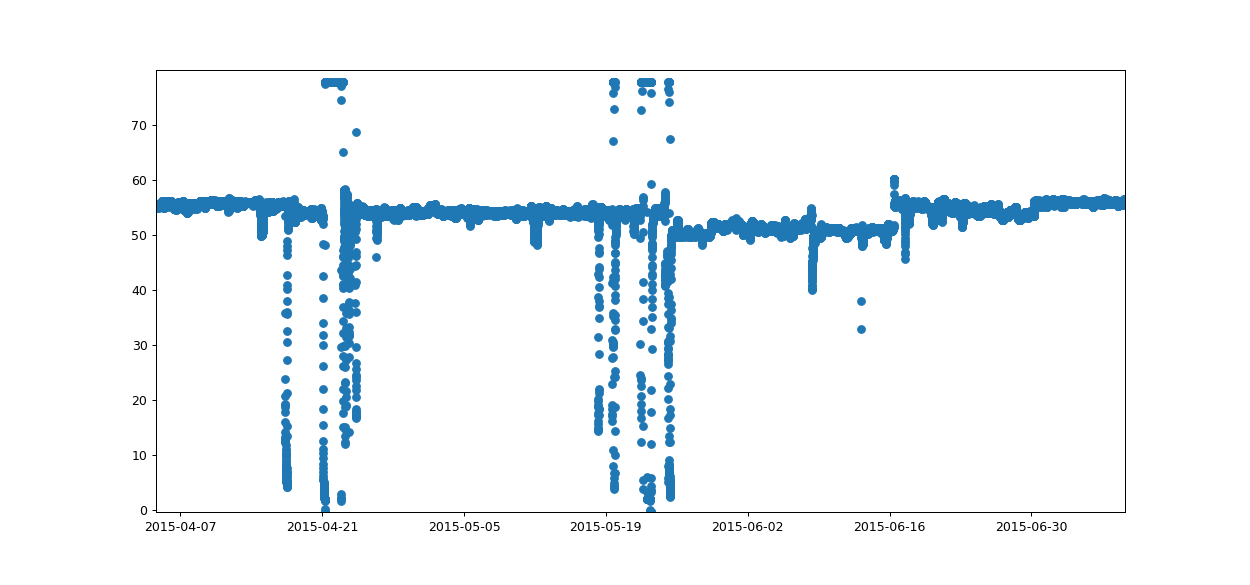

In [97]:
pandacnv.register()

plt.scatter(train_timestamp_smoothed, train_target_smoothed)
plt.show()